<table>
<tr style="background: rgb(139,203,183);
background: linear-gradient(45deg, rgba(139,203,183,1) 0%, rgba(12,94,121,1) 100%);">
<td>
<img src="https://jade-lab.github.io/assets/img/jads-logo-white.png" width="210">
</td>
<td style="">
<h1 style="font-size: 35px; margin: center; padding-left: 100px; padding-right: 100px; color:#2d2f7f;">Modeling & Simulation Final Project</h1>
</td>
<td style="">
<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Eindhoven_University_of_Technology_logo_new.png" width="250">
</td>
</tr>
</table>

## 1. Project Description

Pending

## 2. Finding the station with more probability of failures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import random
import seaborn as sns

In [2]:
# configurations

random.seed( 10 )
number_iterations = 5000

In [3]:
df = pd.read_csv( './disruptions-2011-2021.csv' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39233 entries, 0 to 39232
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rdt_id                39233 non-null  int64  
 1   ns_lines              39233 non-null  object 
 2   rdt_lines             38066 non-null  object 
 3   rdt_lines_id          38066 non-null  object 
 4   rdt_station_names     24538 non-null  object 
 5   rdt_station_codes     24538 non-null  object 
 6   cause_nl              39048 non-null  object 
 7   cause_en              39048 non-null  object 
 8   statistical_cause_nl  39048 non-null  object 
 9   statistical_cause_en  39048 non-null  object 
 10  cause_group           39231 non-null  object 
 11  start_time            39233 non-null  object 
 12  end_time              39157 non-null  object 
 13  duration_minutes      39156 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 4.2+ MB


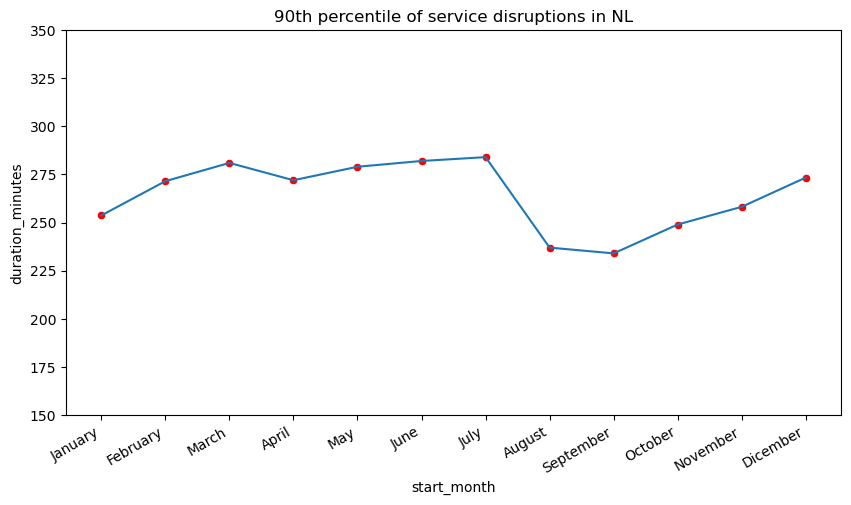

In [4]:
def plot_90th_quantile_alone( df ):
    _, ax = plt.subplots( figsize=(10, 5) )
    
    # plotting the resst of the data

    sns.lineplot( data=df, x='start_month', y="duration_minutes" )
    sns.scatterplot( data=df, x='start_month', y="duration_minutes", ax=ax, color='r' )
    ax.set_ylim( 150, 350,  )
    ax.set_xticks( range( 1, 13 ) )
    ax.set_xticklabels( [ 
        'January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'Dicember' ], rotation=30, ha='right' )

    ax.set_title( '90th percentile of service disruptions in NL' )
    
    plt.show()
    
    

df2 = df.copy()
df2.loc[ :, 'start_month'] = pd.DatetimeIndex( df2.start_time ).month
df_90q2 = df2.groupby( 'start_month' )[[ 'duration_minutes' ]].quantile( q=.90 )
# df_90q.rename( columns={ 'duration_minutes': 'duration_minutes_original' }, inplace=True )

plot_90th_quantile_alone( df_90q2 )

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rdt_id,39233.0,20811.646777,11442.704433,1.0,11064.0,20883.0,30691.0,40499.0
duration_minutes,39156.0,142.118092,610.564329,0.0,24.0,67.0,148.0,64927.0


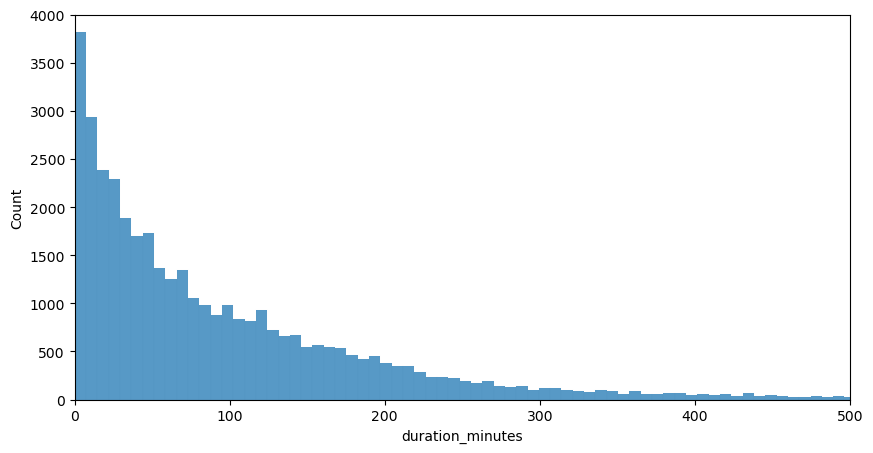

In [6]:
_, ax = plt.subplots( figsize=( 10, 5 ) )
sns.histplot( df, x='duration_minutes', ax=ax )
ax.set_ylim( 0, 4000 )
ax.set_xlim( 0, 500 )
# plt.axvline( x=100, color='r', linestyle='-')
# plt.axvline( x=150, color='r', linestyle='-')
# plt.axvline( x=50, color='r', linestyle='-')
pass

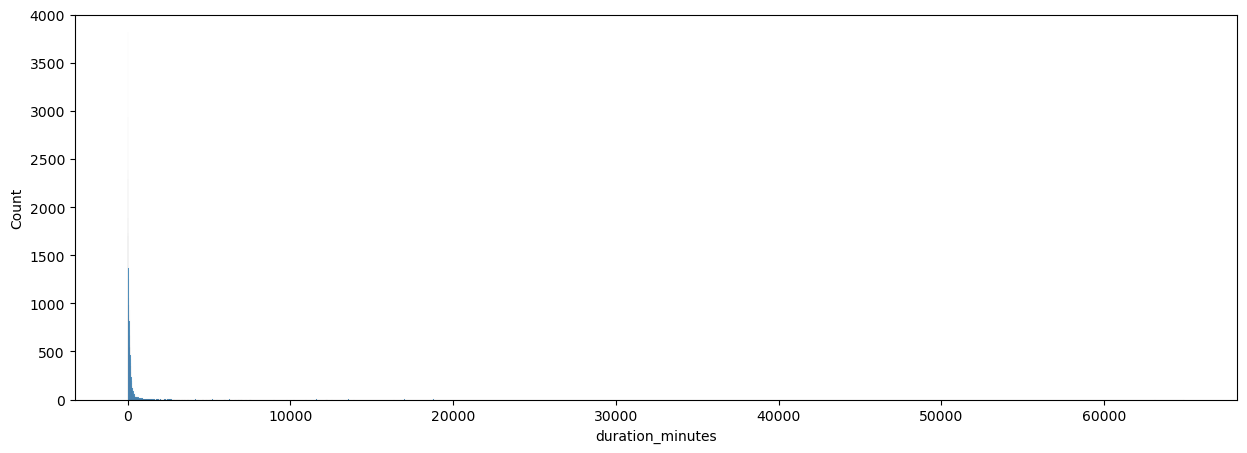

In [7]:
_, ax = plt.subplots( figsize=( 15, 5 ) )
sns.histplot( df, x='duration_minutes', ax=ax )
ax.set_ylim( 0, 4000 )
pass

In [8]:
# lets count by line too find the ones with more data

df.ns_lines.value_counts()

Rotterdam-Breda (HSL)                                           1112
Den Haag-Rotterdam                                               535
Amsterdam-Schiphol-Rotterdam (HSL)                               509
Dordrecht-Breda                                                  470
Breda-Tilburg                                                    454
                                                                ... 
Rotterdam C.-Leiden C.                                             1
Amsterdam Centraal-Amsterdam Sloterdijk/Haarlem na 13.00 uur       1
Amersfoort-Enkhuizen                                               1
Dordrecht-Breda tussen 00.00 en 06.00 uur                          1
Schiphol-Amersfoort; Amsterdam-Amersfoort; Utrecht-Almere          1
Name: ns_lines, Length: 2515, dtype: int64

In [9]:
# lets select all the lines related to Rotterdam

df_rotterdam = pd.DataFrame( df[ df.ns_lines.str.contains( 'Rotterdam' ) ])
df_cumsum_rotterdam = pd.DataFrame(df_rotterdam.ns_lines.value_counts().cumsum())
df_cumsum_rotterdam

,ns_lines
Rotterdam-Breda (HSL),1112
Den Haag-Rotterdam,1647
Amsterdam-Schiphol-Rotterdam (HSL),2156
Schiphol-Rotterdam (HSL),2475
Rotterdam-Dordrecht,2790
...,...
Schiphol-Almere C./Hilversum/Hoofddorp/Leiden C./Rotterdam C./Sloterdijk/Utrecht C.,5573
Rotterdam-Gouda 10.00-14.00 uur Herstelwerkzaamheden,5574
Herstelwerkzaamheden Den Haag HS-Rotterdam tussen 01.00 en 03.00 uur,5575
Rotterdam - Den Haag van 21.00 uur tot 21.30 uur,5576


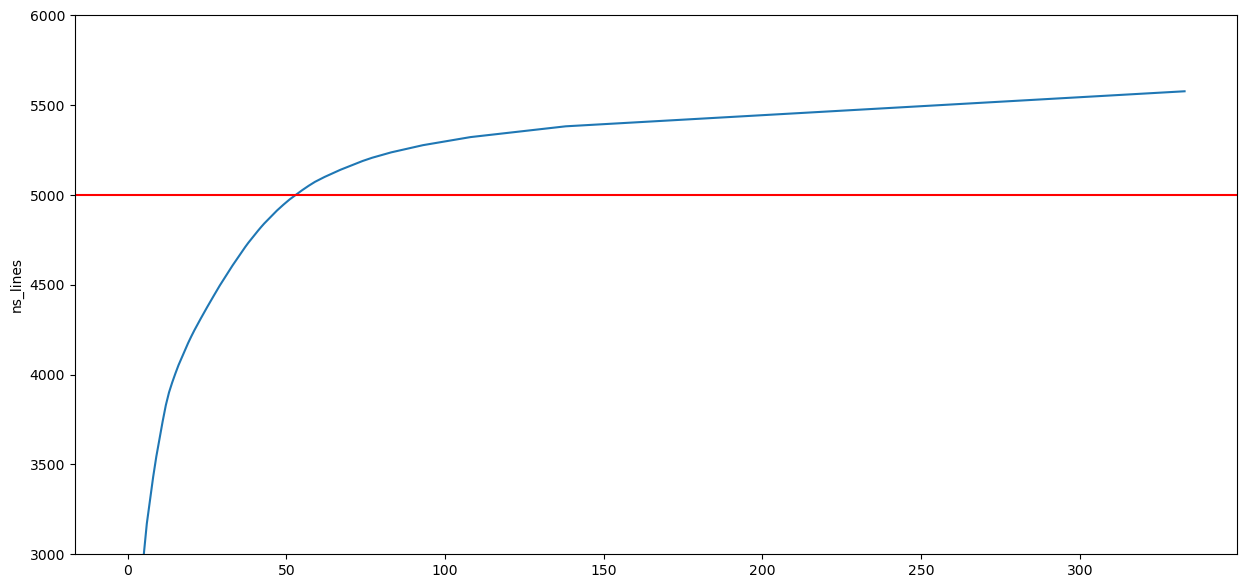

In [10]:
# elbow criteria to get with of the lines with low number of trips

_, ax = plt.subplots( figsize=( 15, 7 ) )
sns.lineplot( y=df_cumsum_rotterdam.ns_lines, x=list( range( df_cumsum_rotterdam.shape[ 0 ] ) ), ax=ax )
ax.set_ylim( 3000, 6000 )
plt.axhline( y=5000, color='r', linestyle='-')

In [11]:
df_rotterdam.shape

(5577, 14)

In [12]:
# removing lines which cumsum is above 5.2K

index_to_remove = df_cumsum_rotterdam[ df_cumsum_rotterdam.ns_lines > 5000 ].index
df_rotterdam = df_rotterdam.set_index( 'ns_lines' ).drop( index_to_remove ).reset_index(drop=False)

del index_to_remove, df_cumsum_rotterdam

In [13]:
df_rotterdam.shape

(4988, 14)

## 3. Calculating 90th percentile per month

In [14]:
df_rotterdam.loc[ :, 'start_month'] = pd.DatetimeIndex( df_rotterdam.start_time ).month
df_90q = df_rotterdam.groupby( 'start_month' )[[ 'duration_minutes' ]].quantile( q=.90 )
df_90q.rename( columns={ 'duration_minutes': 'duration_minutes_original' }, inplace=True )
df_90q

,duration_minutes_original
start_month,
1,224.8
2,331.3
3,246.3
4,209.8
5,214.2
6,228.8
7,281.6
8,211.0
9,198.0


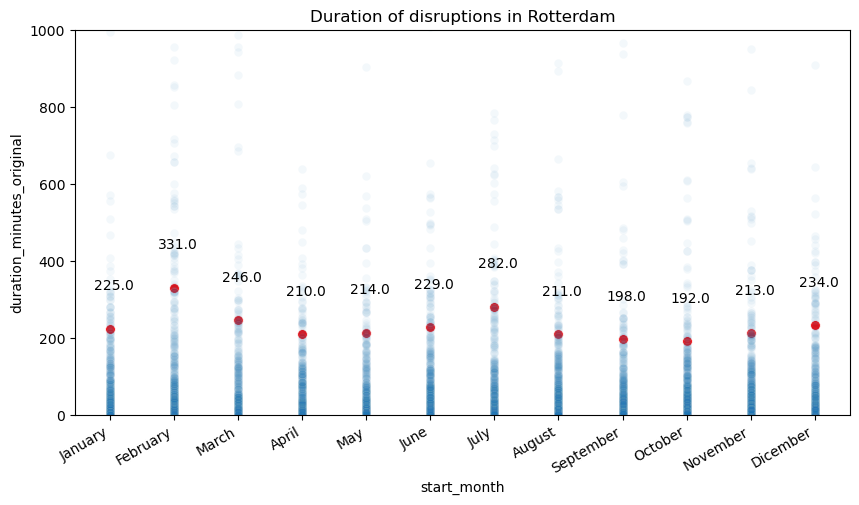

In [15]:
def plot_90th_quantile( df, quantile_df, alpha=0.05, values_col_name='duration_minutes_original' ):
    _, ax = plt.subplots( figsize=(10, 5) )

    # plotting the 90th percentile points

    sns.scatterplot( x=quantile_df.index, 
                     y=quantile_df[ values_col_name ], 
                     marker="o", color='red', s=50)

    hoffset, voffset = 0.75, 100
    for i in range( quantile_df.shape[ 0 ] ):
        ax.text( 
            i + hoffset, quantile_df.iloc[ i ][ values_col_name ] + voffset, 
            round( quantile_df.iloc[ i ][ values_col_name ], 0 ) )

    del hoffset, voffset

    # plotting the resst of the data

    sns.scatterplot( data=df, x='start_month', y="duration_minutes", alpha=alpha )
    ax.set_ylim( 0, 1000,  )
    ax.set_xticks( range( 1, 13 ) )
    ax.set_xticklabels( [ 
        'January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'Dicember' ], rotation=30, ha='right' )

    ax.set_title( 'Duration of disruptions in Rotterdam' )
    
    plt.show()

    
    
plot_90th_quantile( df_rotterdam, df_90q )

## 4. Sampling and Simulation Strategies

**Pending tasks:**

- [X] Complete simple random strategy:
    - [X] Recalculate the 90th percentil
    - [X] Compare result vs the real 90th percentil
    - [X] Create simulation using the same resampling technique
- [X] Perform stratefied sampling:
    - [X] Use route/lines as stratification attribute
    - [X] Recalculate the 90th percentil
    - [X] Compare result vs the real 90th percentil
    - [X] Create simulation using the same resampling technique
- [ ] Answer the following questions in the study:
    - [ ] Contrast results between both techniques
    - [ ] How the sampling stategy affects the outcome?
    - [ ] Are the different assumptions made during the study affecting the final outcome?

**Some general notes:**

- It make more sense stratifying base on the routes because the distribution it's well known. This means, we know for observation and general experience, the distribution of the disruptions by line/route (e.g., because breda-rotterdam is supper frequent there's higher number of disruptions). However, making the same assumption on other attributes may be too risky. For instance, stratifying by disruption type, we don't know if the distribution we are observing is only in our sample of it's the real behaviour of the population.  
- During pressentation show what would happen if other alternatives/decisiones would have been taken for the simulation.

**Extra steps in case we have time:**

- [ ] Try using the mixing effects model in our simulation (check slides from lecture 4)
- [ ] The avg disruption may be different per year, and we can modelate it as a latent variable.

### 4.1 Simple Random Sampling

In [16]:
def simple_random_simulation( df, iterations=1000, sample_size=0.1, seed=64567890 ):
    df_result = pd.DataFrame( columns=list( range( 1, 13 ) ) )

    for i in range( iterations ):
        df_sample = df.sample( frac=sample_size )
        
        # recalcualting the 90th percentile 

        df_temp = df_sample.groupby( 'start_month' )[[ 'duration_minutes' ]].quantile( q=.90 ).reset_index()
        df_temp.set_index( 'start_month', inplace=True )
        df_temp.rename( columns={ 'duration_minutes': f'it_{i + 1}' }, inplace=True )
        df_result = pd.concat( [ df_result, df_temp.T ] )    
        
        del df_temp        
    
    print(df_result.T - df_90q.duration_minutes_original)
    df_result = pd.DataFrame( df_result.mean( axis=0 ) )

    return df_result.reset_index().rename( columns={ 'index': 'start_month', 0: 'duration_minutes_SRS' } ).set_index( 'start_month' )


def plot_results( df ):
    df_temp = df.stack().reset_index().rename( columns={ 'level_1': 'data source', 0: 'value' } )

    _, ax = plt.subplots( figsize=( 10, 5 ) )
    sns.barplot( df_temp, x='start_month', y='value', hue='data source' )
    plt.show()

    del df_temp
    
    
def plot_differencies( df, col_name, title ):
    df_diff = pd.DataFrame( df_90q.duration_minutes_original - df_90q[ col_name ], columns=[ 'value' ] )
    df_diff[ 'positive' ] = df_diff[ 'value' ] > 0

    _, ax = plt.subplots( figsize=( 10, 5 ) )
    sns.barplot( df_diff, 
                x=df_diff.index, 
                y=df_diff.value, 
                palette=df_diff.positive.map({True: 'g', False: 'r'}) )
    ax.set_title( title )
    plt.show()

In [17]:
pd.set_option( "display.precision", 2 )
df_90q = df_90q.merge( simple_random_simulation( df_rotterdam, iterations=1 ), how='left', left_index=True, right_index=True )
df_90q

    it_1   1   2   3   4   5   6   7   8   9  10  11  12
1    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
3    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
4    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
5    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
6    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
7    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
8    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
10   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
11   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
12   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN


,duration_minutes_original,duration_minutes_SRS
start_month,,
1,224.8,270.6
2,331.3,328.1
3,246.3,286.2
4,209.8,230.8
5,214.2,186.4
6,228.8,213.5
7,281.6,278.6
8,211.0,157.7
9,198.0,167.0


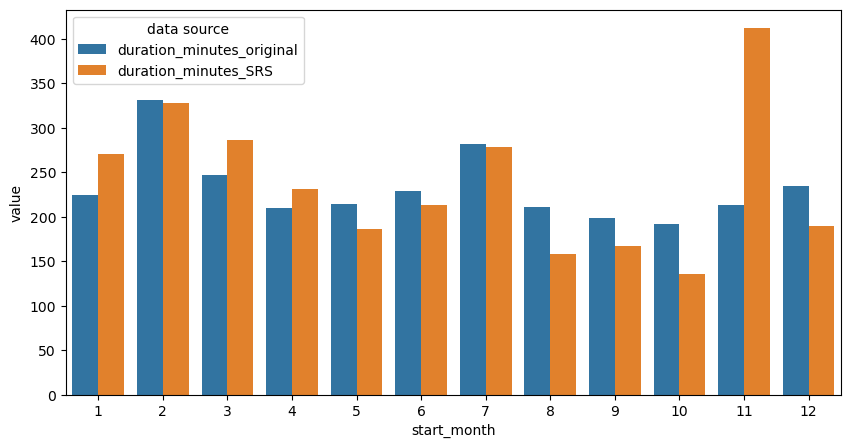

In [18]:
plot_results( df_90q )

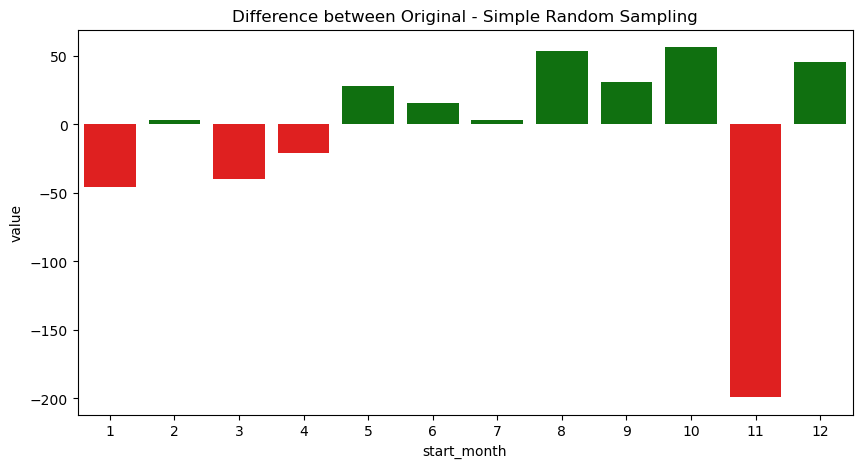

In [19]:
plot_differencies( df_90q, 'duration_minutes_SRS', 
                  'Difference between Original - Simple Random Sampling' )

### 4.2 SRS with 1000 iterations

In [20]:
df_90q = df_90q.merge( simple_random_simulation( df_rotterdam, iterations=1000 ).rename( columns={ 'duration_minutes_SRS': 'duration_minutes_SRS_1000' } ), 
                      how='left', left_index=True, right_index=True )
df_90q

     1   2   3   4   5   6   7   8   9  10  ...  it_990  it_991  it_992  \
1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
2  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
3  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
4  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
5  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
6  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
7  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
8  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
9  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
10 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
11 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   
12 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...     NaN     NaN     NaN   

    it_993  it_994  it_9

,duration_minutes_original,duration_minutes_SRS,duration_minutes_SRS_1000
start_month,,,
1,224.8,270.6,219.01
2,331.3,328.1,325.08
3,246.3,286.2,244.92
4,209.8,230.8,198.21
5,214.2,186.4,214.21
6,228.8,213.5,215.81
7,281.6,278.6,285.51
8,211.0,157.7,210.17
9,198.0,167.0,190.67


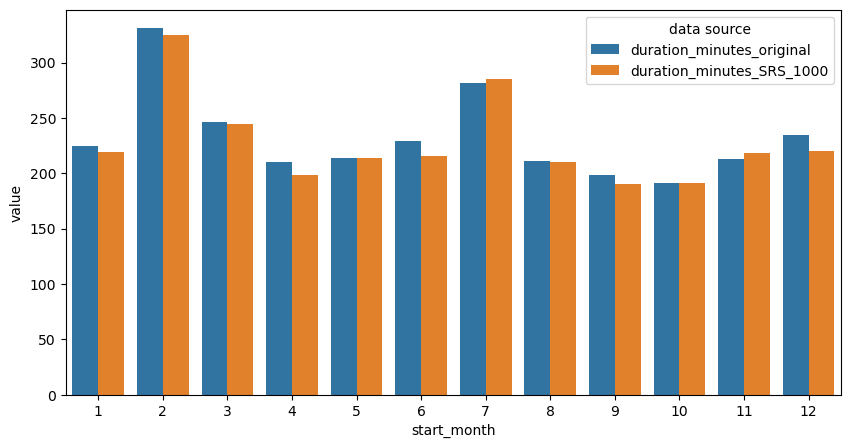

In [37]:
plot_results( df_90q[ ['duration_minutes_original', 'duration_minutes_SRS_1000' ] ] )

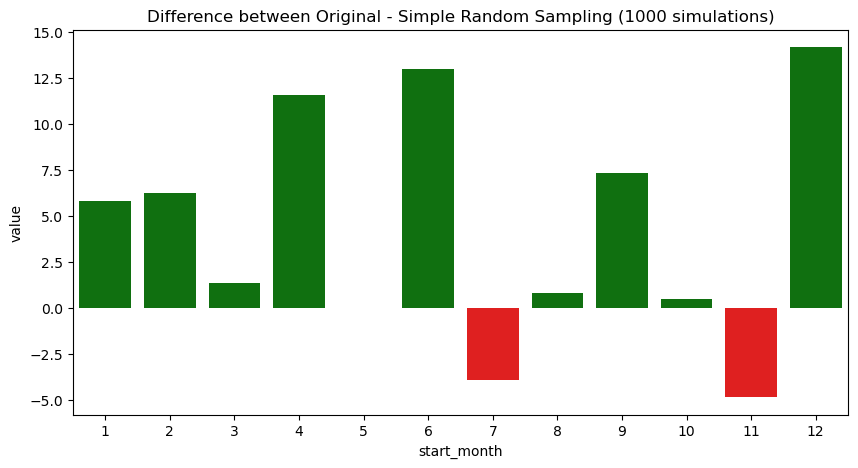

In [22]:
plot_differencies( df_90q, 'duration_minutes_SRS_1000', 
                  'Difference between Original - Simple Random Sampling (1000 simulations)' )

### 4.3. Stratified Sampling Simulation - Single

In [23]:
def stratified_random_simulation( df, iterations=1000, sample_size=0.1, group_name='ns_lines' ):
    df_result = pd.DataFrame( columns=list( range( 1, 13 ) ) )

    for i in range( iterations ):
        df_sample = df.groupby( group_name, group_keys=False ).apply( lambda group: group.sample( frac=sample_size ) )
                
        # recalcualting the 90th percentile 

        df_temp = df_sample.groupby( 'start_month' )[[ 'duration_minutes' ]].quantile( q=.90 ).reset_index()
        df_temp.set_index( 'start_month', inplace=True )
        df_temp.rename( columns={ 'duration_minutes': f'it_{i + 1}' }, inplace=True )
        df_result = pd.concat( [ df_result, df_temp.T ] )    
        
        del df_temp        
    
    df_result = pd.DataFrame( df_result.mean( axis=0 ) )

    return df_result.reset_index().rename( columns={ 'index': 'start_month', 0: 'duration_minutes_stratified' } ).set_index( 'start_month' )

In [24]:
df_90q = df_90q.merge( stratified_random_simulation( df_rotterdam, iterations=1 ), how='left', left_index=True, right_index=True )
df_90q

,duration_minutes_original,duration_minutes_SRS,duration_minutes_SRS_1000,duration_minutes_stratified
start_month,,,,
1,224.8,270.6,219.01,207.2
2,331.3,328.1,325.08,281.8
3,246.3,286.2,244.92,223.6
4,209.8,230.8,198.21,267.4
5,214.2,186.4,214.21,197.7
6,228.8,213.5,215.81,167.8
7,281.6,278.6,285.51,218.8
8,211.0,157.7,210.17,220.0
9,198.0,167.0,190.67,209.7


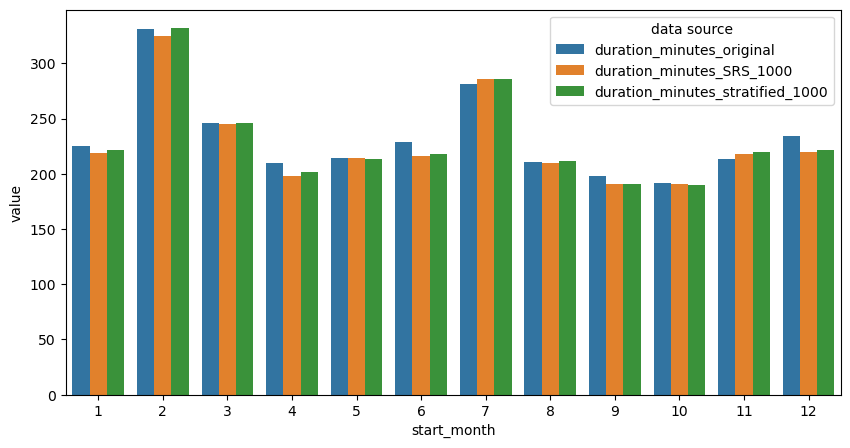

In [34]:
plot_results( df_90q[[ 'duration_minutes_original', 'duration_minutes_SRS_1000', 'duration_minutes_stratified_1000' ]] )

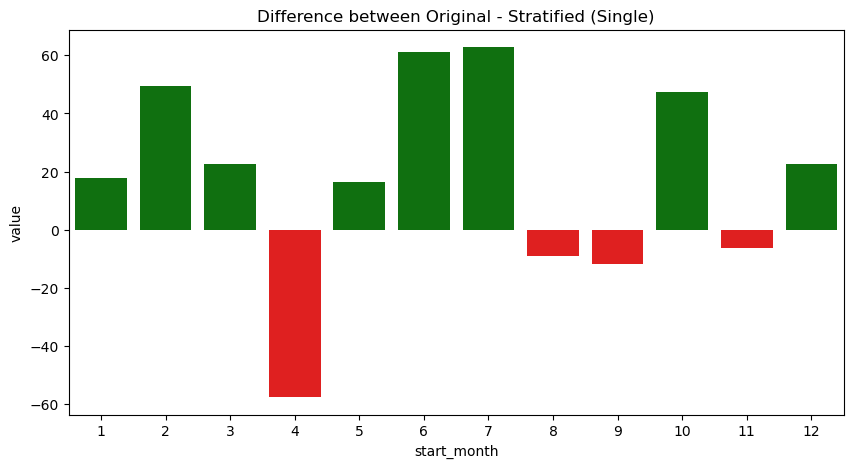

In [26]:
plot_differencies( df_90q, 'duration_minutes_stratified', 
                  'Difference between Original - Stratified (Single)' )

### 4.4 Stratified Sampling Simulation - 1000 iterations

In [27]:
df_90q = df_90q.merge( stratified_random_simulation( df_rotterdam, iterations=1000 ).rename( columns={ 'duration_minutes_stratified': 'duration_minutes_stratified_1000' } ), how='left', left_index=True, right_index=True )
df_90q

,duration_minutes_original,duration_minutes_SRS,duration_minutes_SRS_1000,duration_minutes_stratified,duration_minutes_stratified_1000
start_month,,,,,
1,224.8,270.6,219.01,207.2,221.34
2,331.3,328.1,325.08,281.8,332.07
3,246.3,286.2,244.92,223.6,246.18
4,209.8,230.8,198.21,267.4,201.78
5,214.2,186.4,214.21,197.7,213.57
6,228.8,213.5,215.81,167.8,217.51
7,281.6,278.6,285.51,218.8,286.04
8,211.0,157.7,210.17,220.0,211.10
9,198.0,167.0,190.67,209.7,190.99


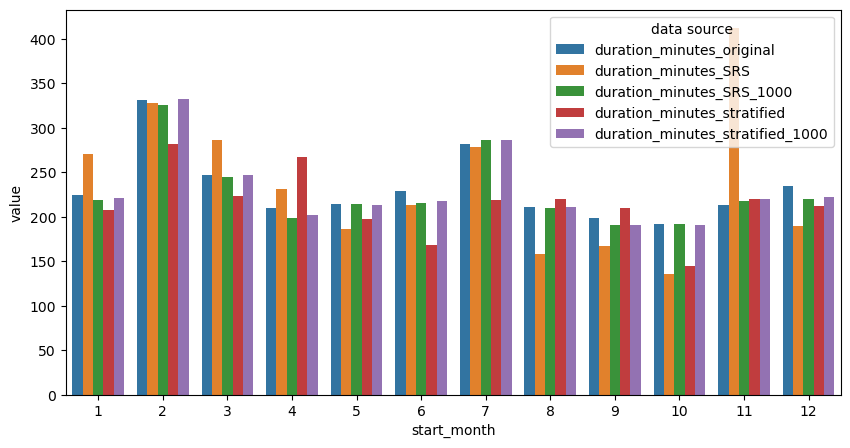

In [28]:
plot_results( df_90q )

## 5. Comparing Strategies

We are going to compare the error between SRS_100 and Stratified_1000

In [29]:
df_temp = df_90q[ [ 'duration_minutes_original', 'duration_minutes_SRS_1000', 'duration_minutes_stratified_1000' ] ]
df_temp

,duration_minutes_original,duration_minutes_SRS_1000,duration_minutes_stratified_1000
start_month,,,
1,224.8,219.01,221.34
2,331.3,325.08,332.07
3,246.3,244.92,246.18
4,209.8,198.21,201.78
5,214.2,214.21,213.57
6,228.8,215.81,217.51
7,281.6,285.51,286.04
8,211.0,210.17,211.10
9,198.0,190.67,190.99


In [30]:
srs1000_error = round(np.absolute( df_temp.duration_minutes_original - df_temp.duration_minutes_SRS_1000 ).sum(), 3)
stratified1000_error = round(np.absolute( df_temp.duration_minutes_original - df_temp.duration_minutes_stratified_1000 ).sum(), 3)

In [31]:
print( f'SRS_1000 error: {srs1000_error}' )
print( f'Stratified_1000 error: {stratified1000_error}' )

SRS_1000 error: 69.534
Stratified_1000 error: 56.545
